In [3]:
import pandas as pd

df = pd.read_csv('df_final.csv')
print(df.shape)

(217069, 6)


In [2]:
print(df.head(3))

   Unnamed: 0         newsID newsCategory newsSubcategory  \
0           0  EC_M05_241847           경제            중기밴처   
1           1  EC_M05_241848           경제              유통   
2           2  EC_M05_241851           경제              유통   

                                newsTitle  \
0                       CCTV 영상으로 핫해진 에스원   
1  홈플러스, 신년 '반값, 하나 더 데이' 행사…하루 빠른 31일 시작   
2                     제주삼다수, 글로벌 품질 인증 갱신   

                                        newsSubTitle  \
0  에스원 자체 제작 영상, 유튜브·틱톡 조회수 3500만회 돌파 유튜버들과 협업한 콘...   
1                                                NaN   
2                                                NaN   

                                         newsContent partNum  useType  \
0  #. 서울의 한 카페, 아르바이트생이 마감 청소 중 춤을 추고 있다.\n춤 솜씨가 ...      P1        1   
1  홈플러스는 새해 첫 쇼핑 축제 '반값, 하나 더 데이' 행사를 경쟁사 대비 하루 빠...      P1        1   
2  제주특별자치도개발공사는 제주삼다수의 품질경영표준 ISO9001을 갱신함과 동시에 미...      P1        1   

  processType  processPattern processLevel  sentenceCoun

In [4]:
#컬림 리스트 확인
print(df.columns)

Index(['Unnamed: 0', 'newsID', 'newsCategory', 'newsSubcategory', 'newsTitle',
       'newsSubTitle', 'newsContent', 'partNum', 'useType', 'processType',
       'processPattern', 'processLevel', 'sentenceCount', 'sentenceInfo'],
      dtype='object')


In [5]:
#사용할 feature만 추출
df = df[['newsTitle','newsSubTitle','newsContent','useType','processPattern']]

In [8]:
#결측치 확인
df.isnull().sum()

newsTitle              0
newsSubTitle      430050
newsContent            0
useType                0
processPattern         0
dtype: int64

newsSubTitle = 기사부제목 만 결측치가 많음.

<Axes: xlabel='useType'>

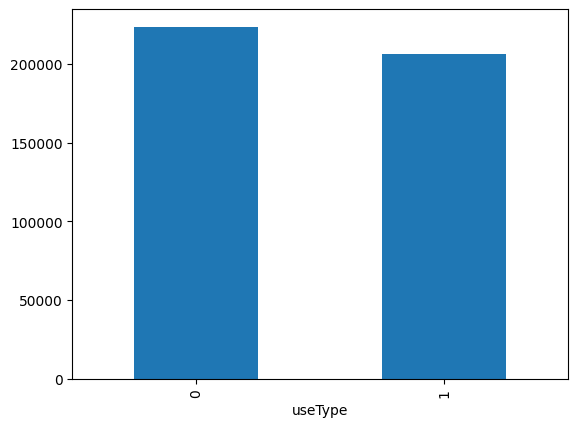

In [7]:
#낚시성기사 유무(useType) 분포도
import matplotlib.pyplot as plt
df[df['newsSubTitle'].isnull()]['useType'].value_counts().plot(kind='bar')

<Axes: xlabel='useType'>

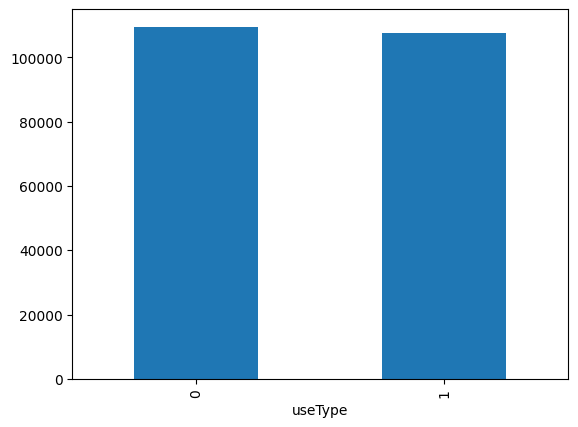

In [9]:
#결측치가 제일 많은 newsSubTitle(기사부제목)에서 결측치를 빼고나서 'useType(낚시성기사 유무)' 데이터 분포 확인
df[~df['newsSubTitle'].isnull()]['useType'].value_counts().plot(kind='bar')

기사 부제목에서 결측치를 삭제했을 때 
1. 좀 더 고르게 낚시성기사 유무(0은 정상 1은 낚시성)가 분포되어 있고
2. 결측치가 엄청 많으며 
3. 크롤링할 기사들을 봤을 때 부제목이 없는 기사가 좀 더 많기 때문에
삭제하기로 결정.

In [13]:
#결측치 삭제후 낚시성 유무갯수확인
df = df.dropna()
df['useType'].value_counts()

useType
0    109478
1    107591
Name: count, dtype: int64

In [14]:
#낚시성기사 유형(processPattern) 갯수확인
df['processPattern'].value_counts()

processPattern
0     107591
99     78973
11      7695
12      4829
24      4704
23      2686
15      2098
14      2064
22      1917
13      1889
21      1490
16      1133
Name: count, dtype: int64

<Axes: xlabel='processPattern'>

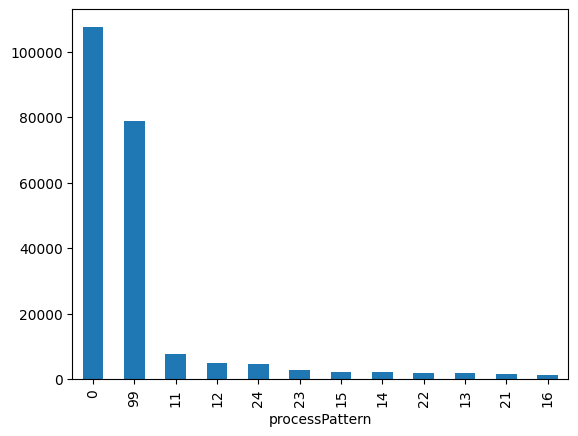

In [18]:
df['processPattern'].value_counts().plot(kind='bar')